# Práctica 3: Tarea de regresión

La tercer práctica consiste en predecir el valor de una variable a partir de un conjunto de variables predictoras en un dataset de venta de casas en Italia. La variable a predecir será el precio de una casa.

Se deberá realizar:

    La limpieza de los datos.
    Un análisis exploratorio de los datos.
    Una técnica de reducción de dimensionalidad.
    Extracción de características para crear por lo menos 2 atributos nuevos (que sean interesantes).
    Aplicar al menos dos técnicas de selección de características.
    Entrenar al menos 4 modelos de regresión diferentes (uno tiene que ser regresión lineal),
    Reportar el resultado de evaluación con una partición de los datos local.
    Reportar el resultado de evaluación con un conjunto de datos de prueba que se les será proporcionado dos días antes.
    Escribir una discusión y las conclusiones sobre el trabajo realizado.

La métrica a utilizar será R².

# Resumen

En este analisis se aplicarón diferentes métodos de regresión, con el objetivo de ajustar un modelo a un conjunto de datos sobre precio de casas en italia. El conjunto de datos contiene 26 columnas relacionadas con la ubicación, el precio, número de habitaciones, año de la construcción, metros cuadrados, numero de baños, disponibilidad asi tambien consideran si cuanta con balcon, chimenea, estacionamiento, jardin, terraza, balcon, alarma, alberca, aire acondicionado, elevador y coordenadas geográficas. El objetivo principal es ajustar un modelo de regresión para el precio de los departamentos en Italia en función de las variables restantes. 

### Limpieza
Para la limpieza de los datos se eliminarón todos los valores perdidos y se conservarón todas las variables, posteriormente se eliminaron los valores en la variable de precio que eran menores a 1, a su vez se selecciono hasta el quartil 95% y el 5% restantes se excluyo del analisis debido a los valores extremos que influian en el modelo resultante.
A su vez se eliminaron los valores mayores a 30 en la variable floor debido a que se considerarón como valores extremos que pueden estar influyendo en los resultados finales. Por ultimo se ajustarón modelos con los datos escalados via escalamiento min-max y con los datos sin escalar. 

### Analisis exploratorio
A traves del analisis exploratorio se identifico el comportamiento de los valores extremos en el precio de los departamentos asi como la acumulación de valores que eran cercanos a cero los cuales se considero no confiables. A su vez, se construyo un gráfico de cajas en función del precio y el número de cuartos de esta manera se verificó que el seleccionar los registros de la variable precio menor al quartil 95% no afectaba en el desarrollo resultante del analisis. 
A su vez, se construyo un gráfico de correlación sin embargo, la mayoria de las variables presentan correlaciones menores a 0.5 lo cual indica una correlación baja entre las variables disponibles. Por otro lado se graficarón las variables de manera vibariada y se identifico que las variables que podrian tener un nivel de interacción mayor eran las variables de numero de habitaciones, número de pisos, metros cuadrados, número de baños y año de la construcción.

### Reducción de dimensionalidad 

A su vez se aplico el metodo de analisis discriminante lineal para identificar si era posible la separación entre las diferentes variables sin embargo no se presenta una separación adecuada entre los datos disponibles. 

### Selección de características 

Por otro lado, se aplicarón los metodos de lasso regularizado y Chi-Cuadrada para seleccionar caracteristicas potenciales que podrian favorcer al modelo de regresión que se ajustaria. Para el caso de Lasso regularizado, se obtuvieron como mayormente influyentes las variables de número de baños, alarma y alberca. A su vez para el método de chi cuadrada se obtuvieron las variables de metros cuadrados, número de baños, años de la construcción, terraza, jardin, alarma, alberca y elevador. 

### Ajustes de métodos de regresión 
Por ultimo se ajustarón diferentes metodos de regresión como un primer acercamiento se realizo un escalamiento min-max a las variables y se ajustaron los tecnicas de regresión de ridge, lasso, random forest, regresión lineal multiple y regresión lineal sin embargo se obtuvierón resultados de r²= 0.22 en el mejor de los casos. 
Posteriormente se aplicaron 12 métodos de regresión para ajustar un modelo a los datos sin escalar, de los métodos anteriores los mejores resultados en conjunto de entrenamiento fueron para random forest r²= .82, regresion bagging r²= 78, regresión extra trees r² = 90. Sin embargo en el conjunto de prueba los métodos que obtuvierón mejores resultados fueron regresion Cat Bost r² = 0.32, regresion de gradiente Bosting y XGB Regresión r² = 0.31.

In [90]:
#se cargan las librerias necesarias y se lee el conjunto de datos y se calculan las estadisticas descriptivas desde este momento 
#es posible identificar que el valor maximo esta extremadamente alejado del quartil 75 asi tambien se identifica que algunas variables son 
#binarias y discretas. 

import pandas as pd
import numpy as np
df= pd.read_csv("Downloads/train_housing_data_italy.csv")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,213409.0,1.661136e+09,1.266113e+04,1.661114e+09,1.661125e+09,1.661136e+09,1.661146e+09,1.661159e+09
price,175931.0,2.413253e+05,7.739356e+06,1.000000e+00,7.700000e+04,1.350000e+05,2.350000e+05,2.147484e+09
n_rooms,155561.0,3.503442e+00,9.855944e-01,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
floor,144307.0,1.820466e+00,1.134597e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.200000e+01
mq,209520.0,1.586923e+02,1.287083e+02,1.000000e+00,8.000000e+01,1.180000e+02,1.890000e+02,9.990000e+02
n_bathrooms,199605.0,1.587751e+00,6.681131e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
year_of_construction,213399.0,1.965096e+03,7.666375e+01,1.000000e+03,1.960000e+03,1.980000e+03,2.000000e+03,2.209000e+03
has_garage,213409.0,1.802923e-01,3.844316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_terrace,213409.0,1.118088e-01,3.151318e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_garden,213409.0,1.648806e-01,3.710736e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [2]:
# Se eliminan los valores perdidos y se filtran los datos de las variables de acuerdo a condiciones de contexto de los datos 
#asi tambien se filtraron los datos donde la variable de pisos es menor a 30 debido a que era un valor extremo
# a su vez se seleccionarón los registros con año de la construcción menor a 2025
df.describe()
df.info()
df.isnull().sum()
df= df.dropna()
df.info()
df = df.query('price>1 & price < 3300000.0 & floor < 30 & year_of_construction< 2025')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
10,1.661114e+09,zumpano,"appartamento via alcide de gasperi 7, zumpano",90000.0,5.0,2.0,124.0,2.0,2002.0,not free / other,...,0,0,0,0,0,0,0,1,39.310894,16.292094
13,1.661114e+09,zumpano,"quadrilocale via san pasquale 19, zumpano",59000.0,4.0,3.0,127.0,1.0,2001.0,not free / other,...,0,1,0,1,0,0,1,0,39.310894,16.292094
15,1.661114e+09,zafferana etnea,"rustico via monte pomiciaro, zafferana etnea",65000.0,2.0,3.0,45.0,1.0,1950.0,not free / other,...,0,0,0,0,0,0,0,0,37.693285,15.106460
16,1.661114e+09,zafferana etnea,"terratetto unifamiliare via algerazzi snc, zaf...",120000.0,2.0,3.0,45.0,1.0,1900.0,not free / other,...,0,1,0,0,0,1,0,0,37.693285,15.106460
17,1.661114e+09,vinchiaturo,"villa unifamiliare strada comunale piana 1, vi...",22000.0,2.0,3.0,70.0,1.0,1900.0,not free / other,...,0,0,0,0,0,0,0,0,41.492925,14.590729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213402,1.661159e+09,bari,"quadrilocale buono stato, primo piano, carrass...",215000.0,4.0,1.0,128.0,1.0,1960.0,not free / other,...,0,0,0,0,0,0,0,0,41.125784,16.862029
213404,1.661159e+09,bari,"bilocale via nazionale 12, palese, bari",100000.0,2.0,1.0,50.0,1.0,1994.0,not free / other,...,0,0,0,1,0,0,0,0,41.125784,16.862029
213405,1.661159e+09,bari,villa unifamiliare via antonio quaranta 52 e 5...,130000.0,4.0,1.0,190.0,2.0,1994.0,not free / other,...,0,0,0,0,0,0,0,0,41.125784,16.862029
213406,1.661159e+09,bari,"trilocale via niccolò pizzoli, libertà, bari",210000.0,3.0,1.0,80.0,1.0,1920.0,not free / other,...,0,0,0,1,0,0,0,0,41.125784,16.862029


<Axes: xlabel='price', ylabel='mq'>

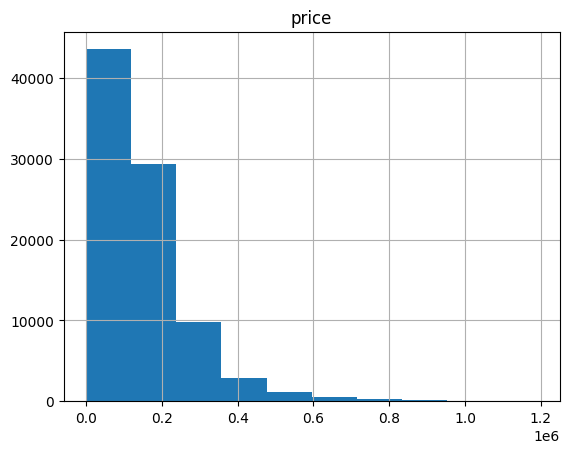

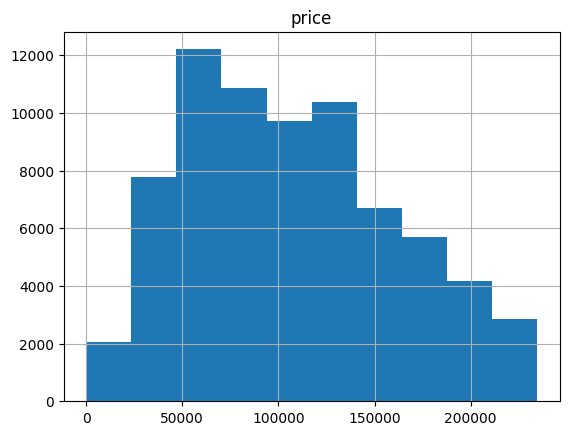

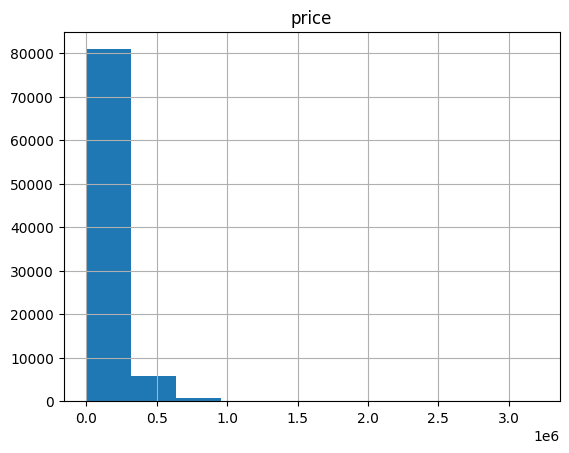

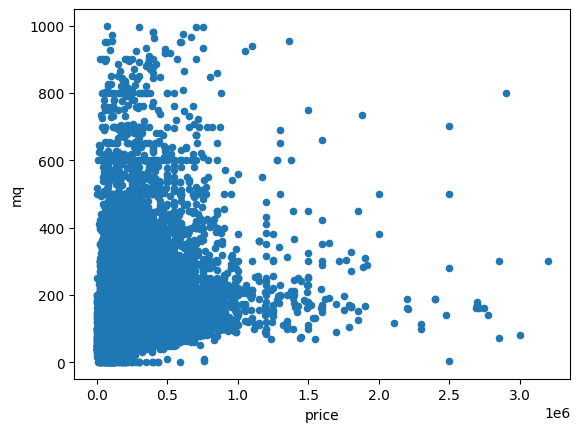

In [3]:
# Por ultimo se graficaron la variable de precio con restricciones en los valores para ientificar el comportamiento de los datos 
#ya que si considerabamos todos los registros contenia demasiados valores extremos y no se lograba identificar la distribucipm de los datos 
# as u vez se graficó un scatter plot entre el precio y los metros cuadrados del departamento y se identifico que 
#existe amplia variabilidad entre el tamaño del departamento en metros cuadrados y el precio 
#lo anterior no orienta a realizar la hipotesis que las demasia variables podrian estar influyendo en el precio final de las casas.
df[['price']][df['price']<1200000].hist() 
df[['price']][df['price']<2.350000e+05].hist()
df[['price']].hist()
df.plot.scatter(x='price', y='mq')

array([[<Axes: title={'center': 'timestamp'}>]], dtype=object)

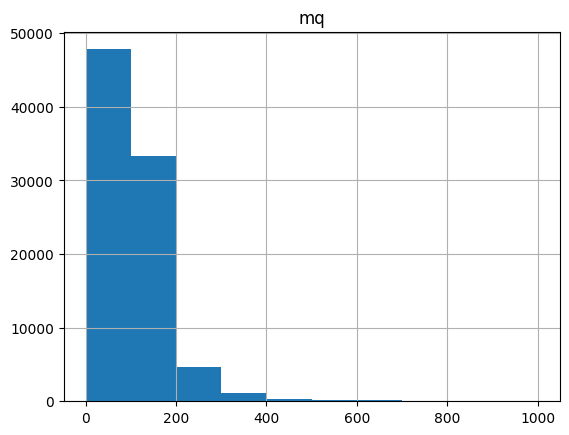

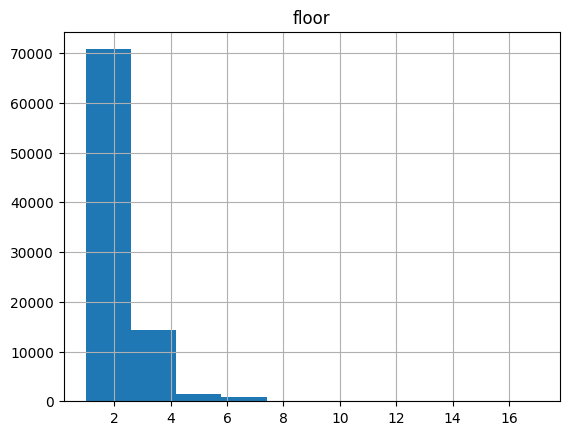

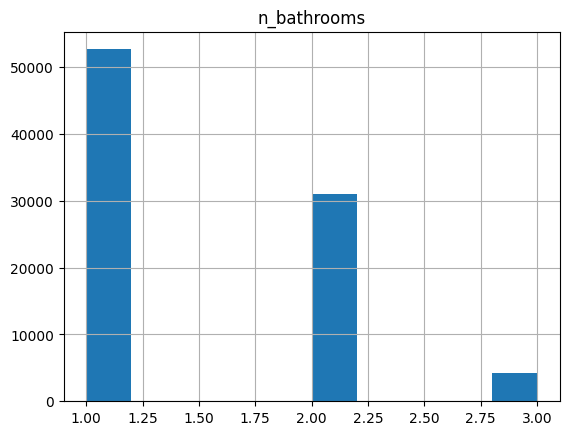

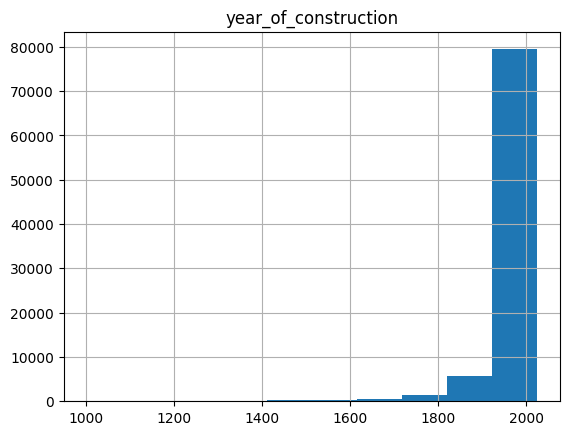

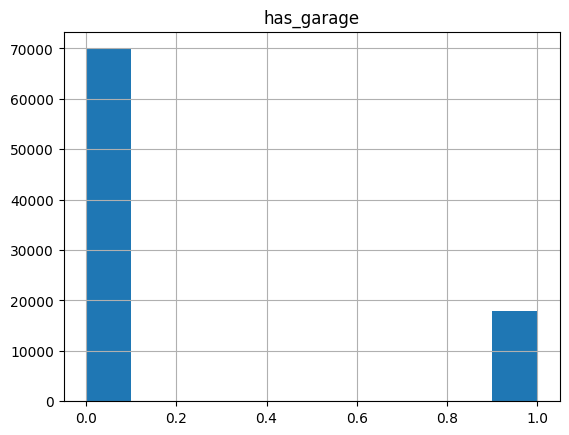

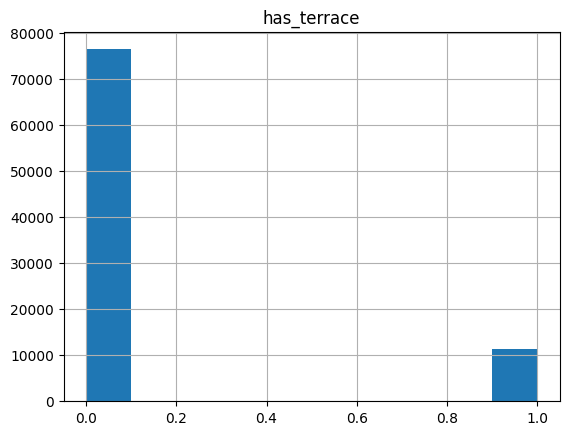

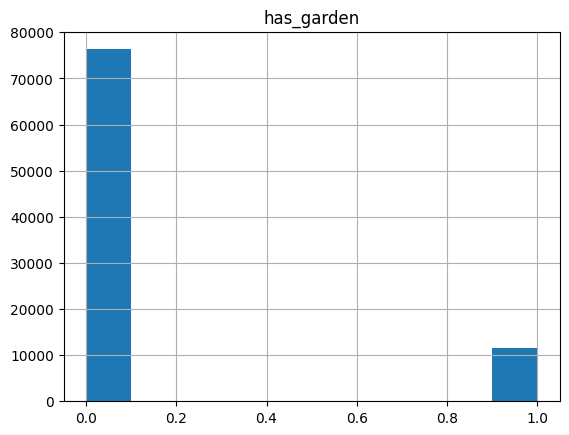

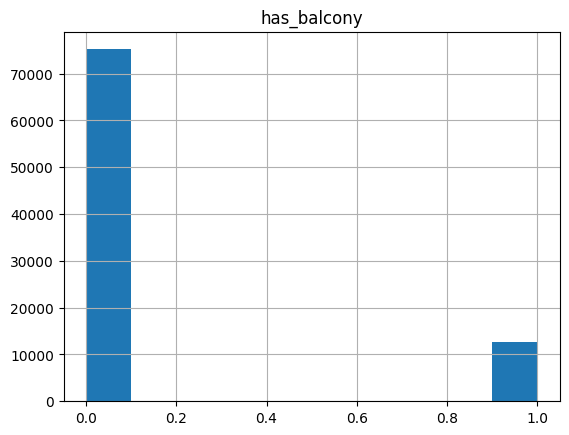

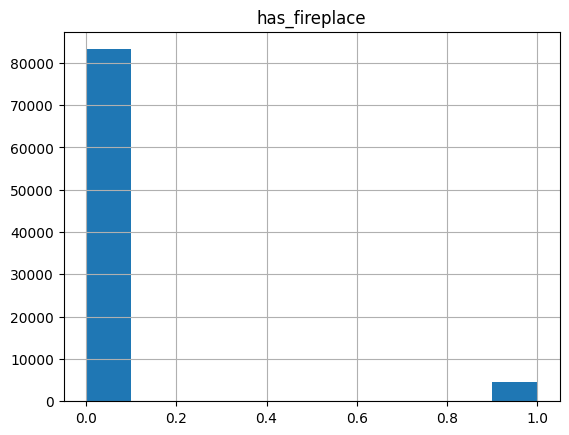

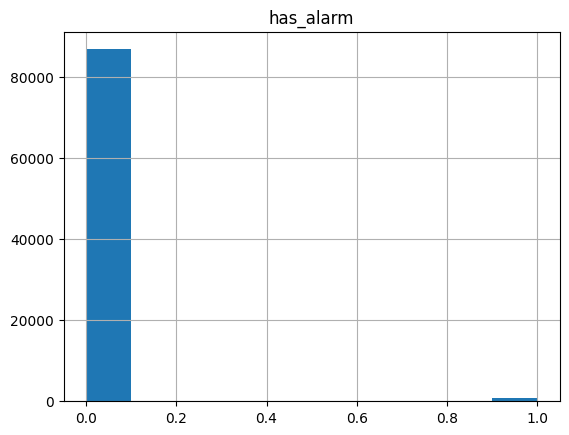

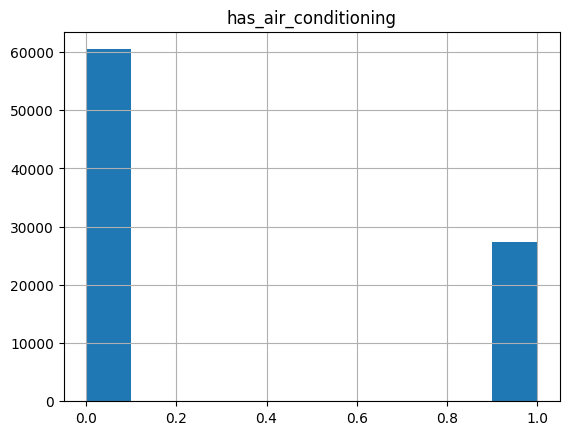

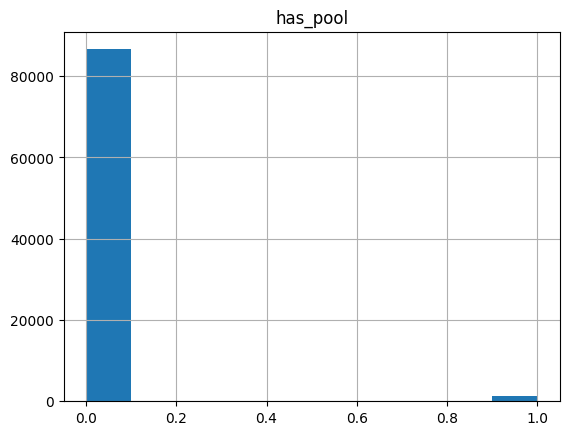

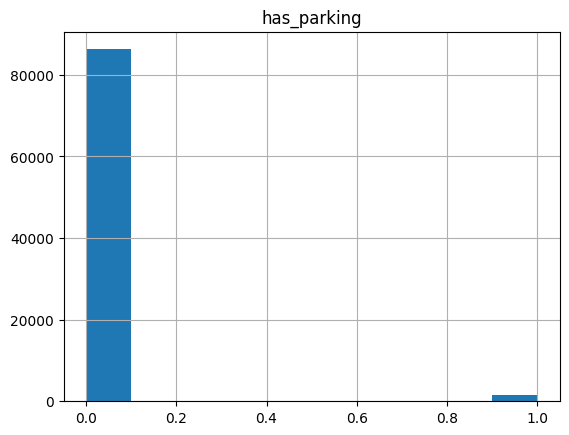

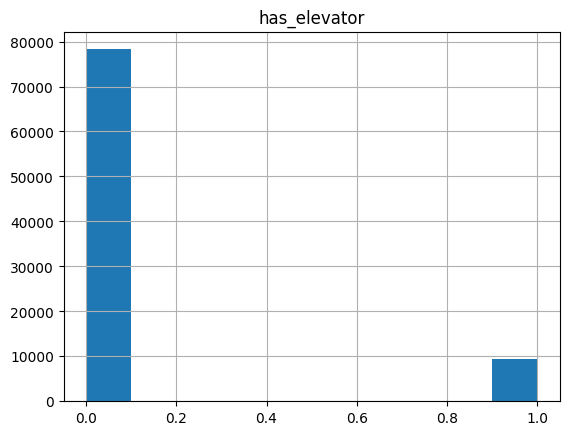

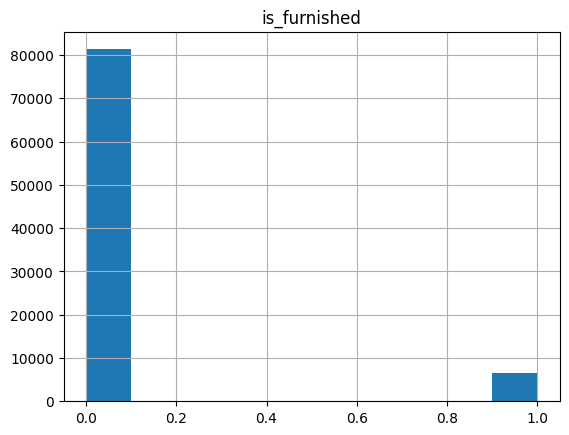

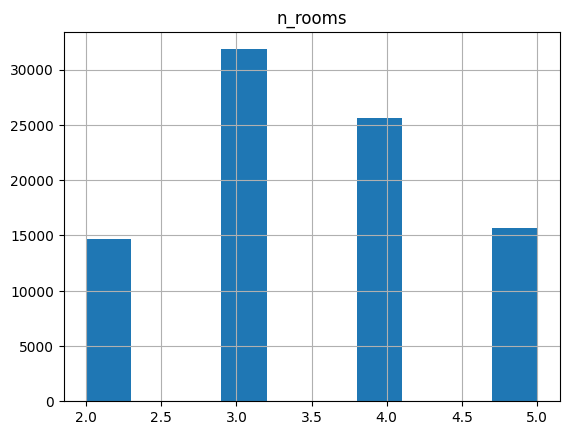

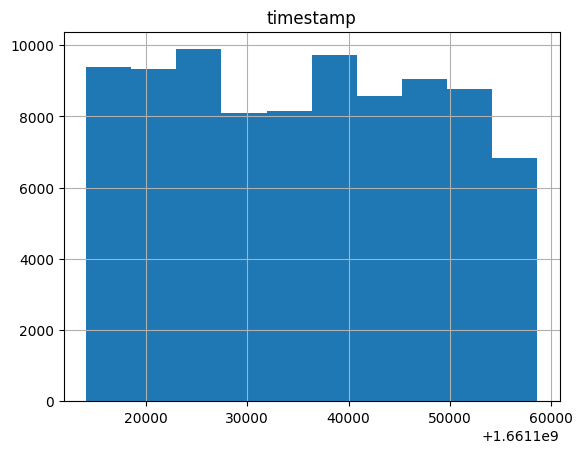

In [4]:
#Posteriormente se graficarón todas las variables númericas dentro del conjunto de datos y se identífico que 
# la mayoria de las casas son menore s a 400 m², tienen solo un baño, fueron construidas despues del año 1800, 
#la mayoria de las casas no cuenta con chimenea, jardin, estacionamiento, balcón, terraza, alarma, alberca ni elevador
# Por otro lado la mayoria de las casa cuentan entre 2 a 4 cuartos, 

df[['mq']].hist()
df[['floor']].hist()
df[['n_bathrooms']].hist()
df[['year_of_construction']].hist()
df[['has_garage']].hist()
df[['has_terrace']].hist()
df[['has_garden']].hist()
df[['has_balcony']].hist()
df[['has_fireplace']].hist()
df[['has_alarm']].hist()
df[['has_air_conditioning']].hist()
df[['has_pool']].hist()
df[['has_parking']].hist()
df[['has_elevator']].hist()
df[['is_furnished']].hist()
df[['n_rooms']].hist()
df[['timestamp']].hist()

In [5]:
df.isnull().sum()

timestamp               0
location                0
title                   0
price                   0
n_rooms                 0
floor                   0
mq                      0
n_bathrooms             0
year_of_construction    0
availability            0
energy_class            0
status                  0
heating                 0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
latitude                0
longitude               0
dtype: int64

In [6]:
df.describe() # se calculan los cuartiles para eliminar el 5% de los datos mas grandes para que no influyan en el analisis final
df['price'].quantile([0.25, 0.5, 0.75,0.95])

0.25     70000.0
0.50    120000.0
0.75    189000.0
0.95    380000.0
Name: price, dtype: float64

/tmp/ipykernel_8664/682941916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='price', x='n_rooms',


,timestamp,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
count,8.335700e+04,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000,83357.000000
mean,1.661136e+09,130997.008758,3.449872,1.826181,111.273606,1.414398,1969.979738,0.204278,0.126696,0.125364,0.145999,0.052017,0.009657,0.308648,0.011013,0.017719,0.109709,0.073455,43.802279,11.134714
std,1.274636e+04,80488.857830,0.966879,1.100271,67.597255,0.562309,65.650811,0.403175,0.332634,0.331134,0.353107,0.222063,0.097796,0.461938,0.104363,0.131929,0.312528,0.260884,2.357218,2.661637
min,1.661114e+09,10.000000,2.000000,1.000000,1.000000,1.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.511134,6.703205
25%,1.661124e+09,69600.000000,3.000000,1.000000,73.000000,1.000000,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.265033,9.041875
50%,1.661136e+09,115000.000000,3.000000,2.000000,97.000000,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.820768,10.561197
75%,1.661146e+09,175000.000000,4.000000,2.000000,130.000000,2.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,45.593865,13.067291
max,1.661159e+09,379000.000000,5.000000,17.000000,999.000000,3.000000,2024.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.003740,18.492161


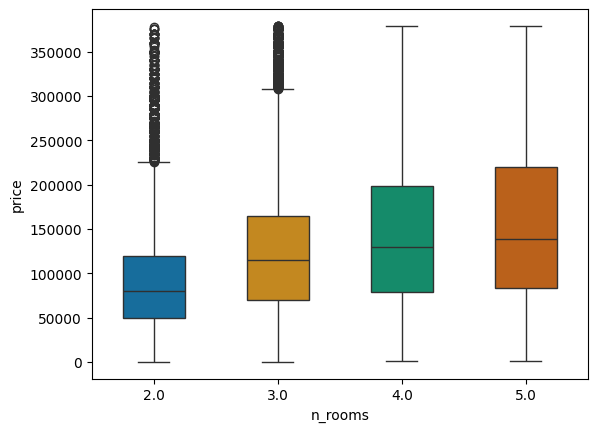

In [7]:
df = df.query('price < 380000.0')
import seaborn as sns 
sns.boxplot(y='price', x='n_rooms', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")
df.describe()
#por ultimo se realizan un grafico de cajas y se identifica que de la categoria de número de habitaciones las casas que solo tienen dos y tres habitaciones 
#presentan un mayor número de datos extremos.

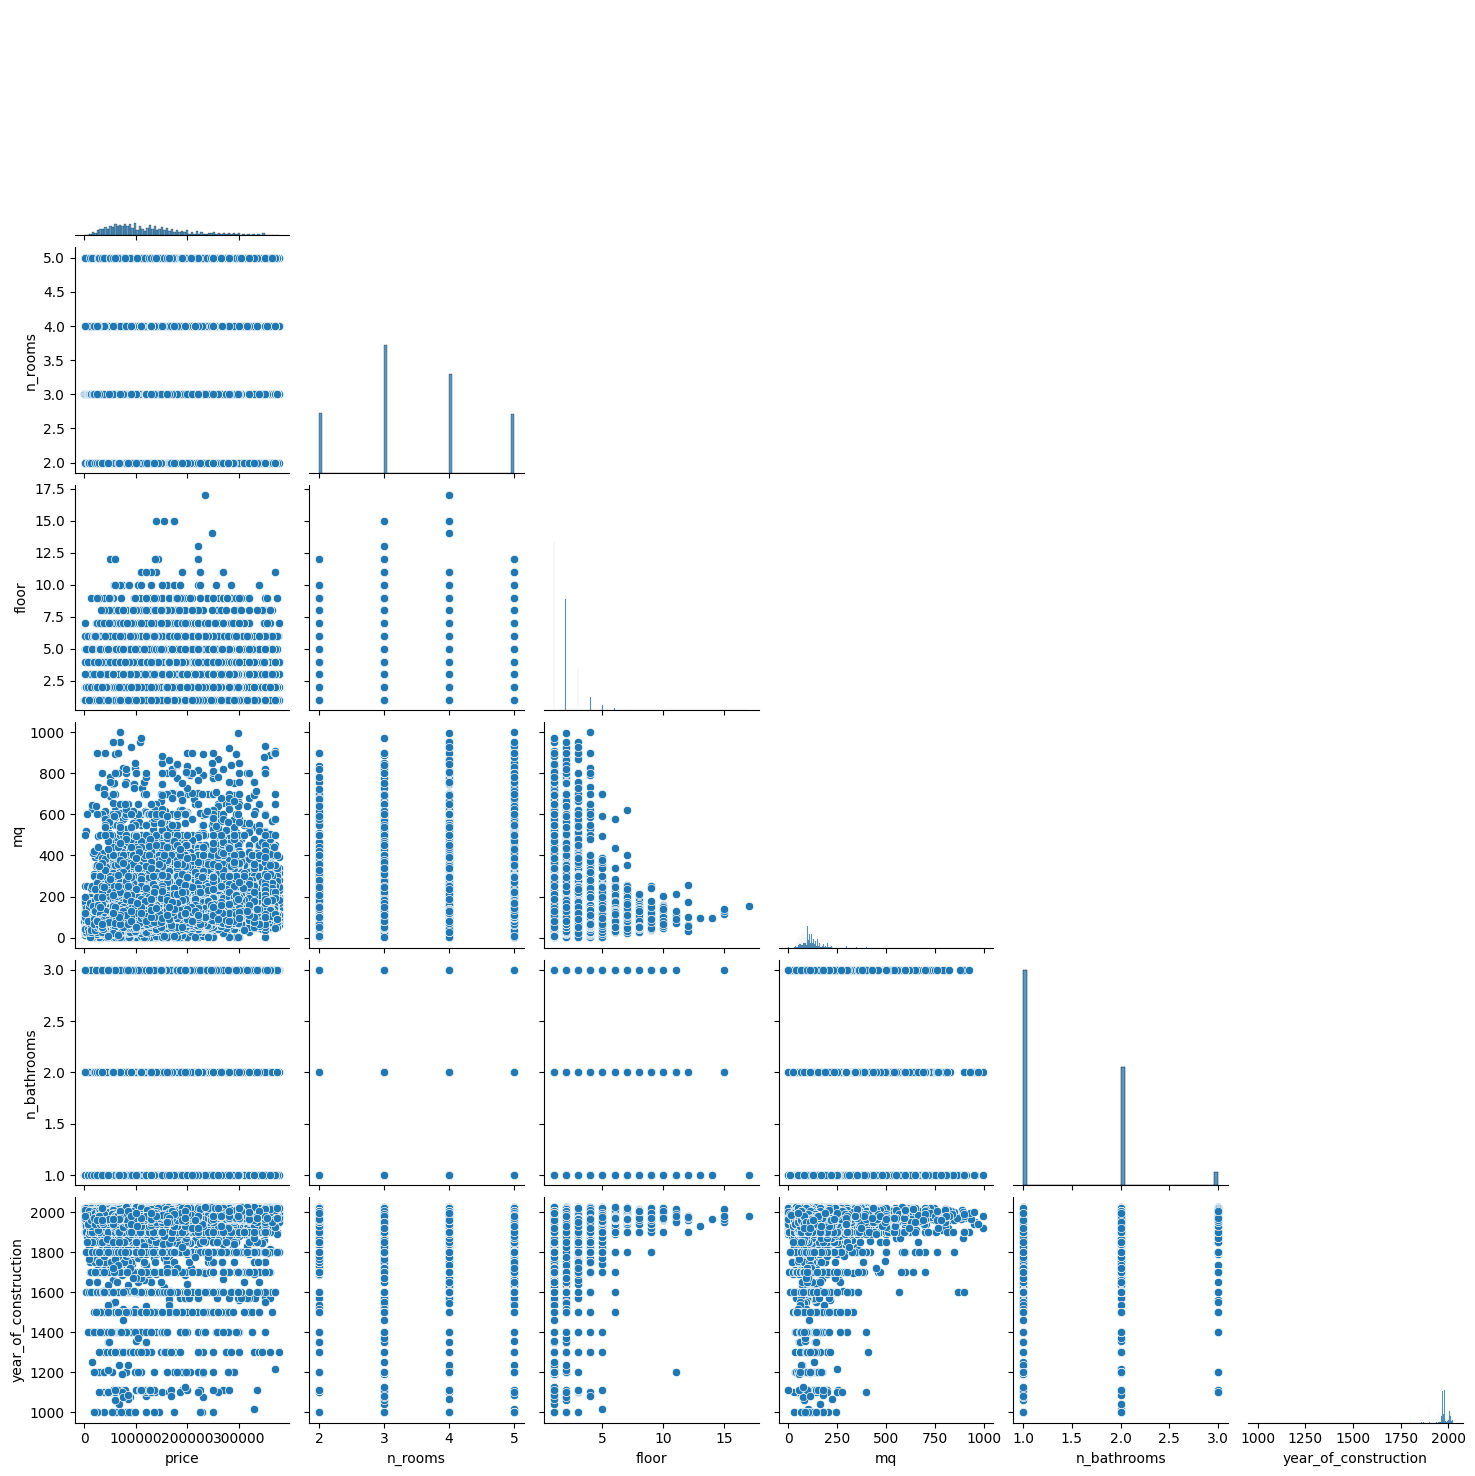

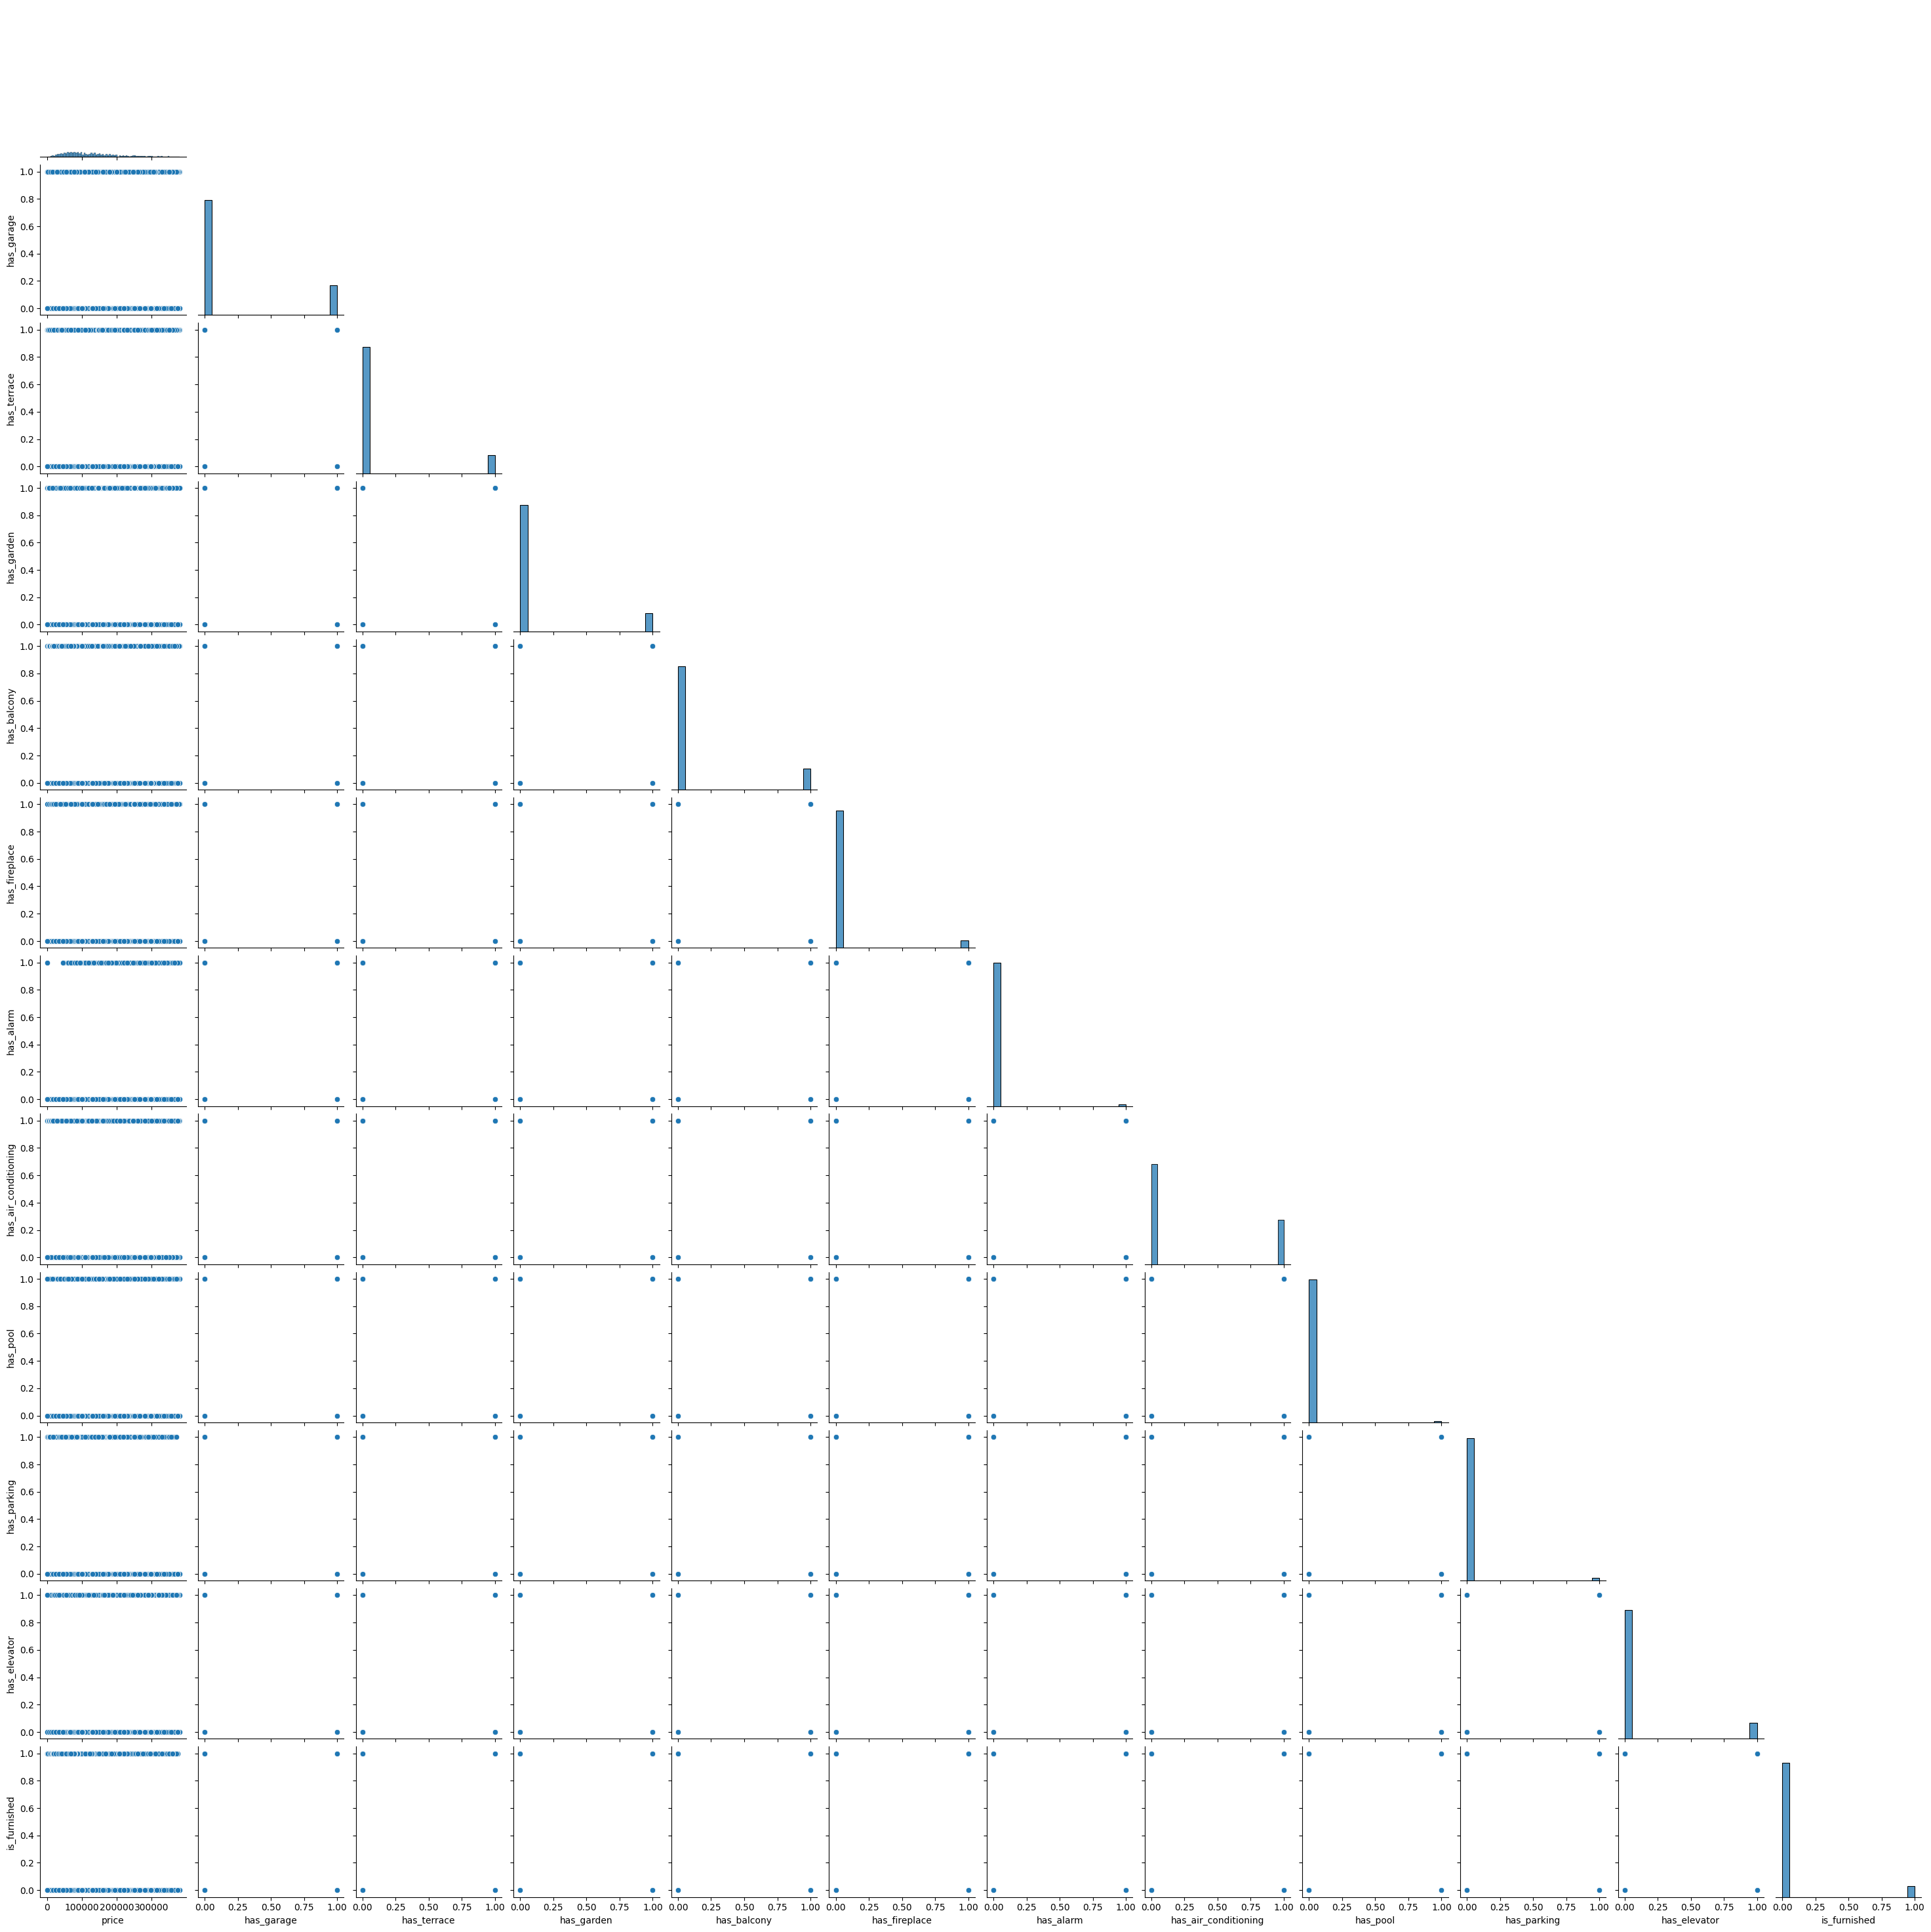

In [8]:
#sns.pairplot(
 #   df, corner=True,
  #  x_vars=["price", "n_rooms",	"floor", "mq", "n_bathrooms", "year_of_construction", "has_garage", "has_terrace", 	
   #         "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
    #        "has_pool", "has_parking", "has_elevator", "is_furnished"],
    #y_vars=["price", "n_rooms",	"floor", "mq", "n_bathrooms", "year_of_construction", "has_garage", "has_terrace", 	
     #       "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
      #      "has_pool", "has_parking", "has_elevator", "is_furnished"],
#)

sns.pairplot(
    df, corner=True,
    x_vars=["price", "n_rooms",	"floor", "mq", "n_bathrooms", "year_of_construction"],
    y_vars=["price", "n_rooms",	"floor", "mq", "n_bathrooms", "year_of_construction"],
)

sns.pairplot(
    df, corner=True,
    x_vars=["price","has_garage", "has_terrace", 	
            "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
            "has_pool", "has_parking", "has_elevator", "is_furnished"],
    y_vars=["price","has_garage", "has_terrace", 	
            "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
            "has_pool", "has_parking", "has_elevator", "is_furnished"],
)

# posteriormente se grafico un pair plot para la viasualización y se identificaron las variables que presentan mayor interacción entre 
#las diferentes variables y se construyerón dos gráficos para mejorar la visualización.

# Reducción de dimensionalidad 
# LDA 

Se áplico el método de analisis de discriminante líneal sin embargo no obtiene un buen desemepeño en la separación de los grupos. 

In [9]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP

2024-10-01 15:08:59.349693: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 15:08:59.598858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 15:08:59.681165: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 15:08:59.709889: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 15:08:59.859055: I tensorflow/core/platform/cpu_feature_guar

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


X = df[["price","floor", "mq", "n_bathrooms", "year_of_construction", "has_garage", "has_terrace", 	
           "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
            "has_pool", "has_parking", "has_elevator", "is_furnished"]]
y= df.n_rooms
y
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

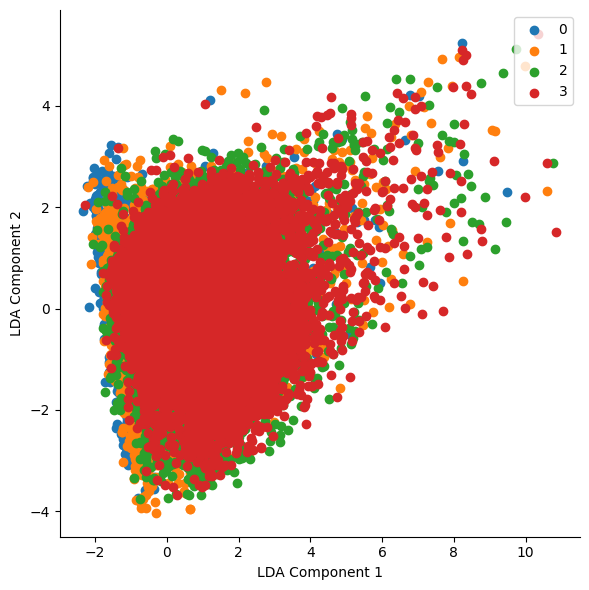

In [12]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['categoria']=y_train

sns.FacetGrid(tmp_Df, hue ="categoria",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')

In [13]:
X = df[['n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 
    'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool',
    'has_parking', 'has_elevator', 'is_furnished']]


y = df[['price']]

# Selección de características

Los métodos de selección de características fueron el método de lasso regularizado, y la prueba Chi Cuadrado, las variables que fuerón seleccionadas para los dos métodos fuerón número de baños, alarma y alberca. Sin embargo se realiza la observación que de acuerdo al analisis exploratorio los métodos podrian estar incurriendo en un sesgo de supervivencia. 

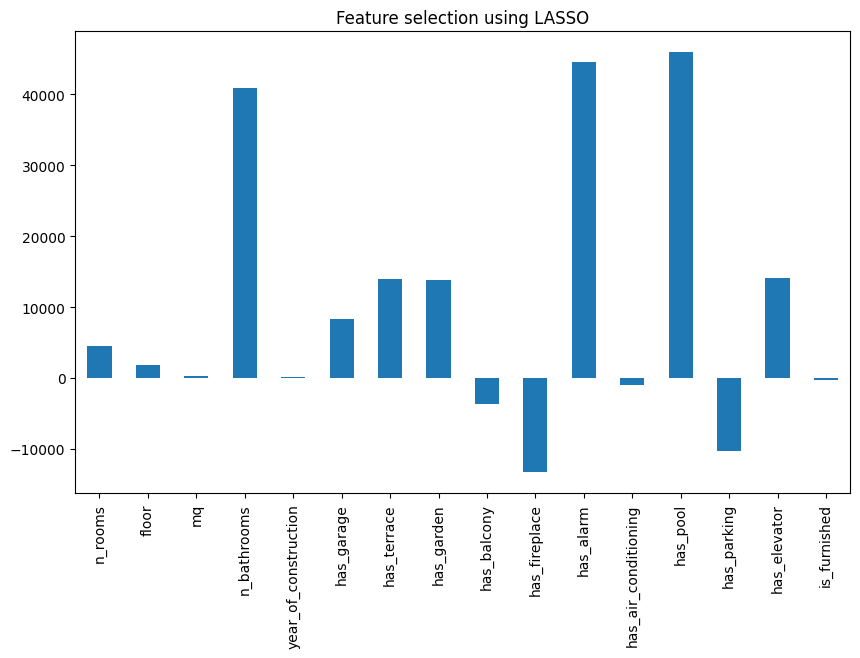

In [14]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# start time
#start_time_forward = time.time()

### Applying feature selection method
lasso = Lasso(alpha=0.1)  # adjust alpha
lasso.fit(X, y)

# end time
#end_time_forward = time.time()
#time_forward = end_time_forward - start_time_forward

# show feature selection
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(10, 6))
lasso_coef.plot(kind='bar')
plt.title('Feature selection using LASSO')
plt.show()

# show elapsed time of this method
#print(f"Execution time: {time_forward:.2f} seconds")

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# start time
#start_time_forward = time.time()

### Applying feature selection method
bfs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='backward')
bfs.fit(X, y)

# end time
#end_time_forward = time.time()
#time_forward = end_time_forward - start_time_forward

# show feature selection
selected_features = bfs.get_support()
print('The selected features are:', list(X.columns[selected_features]))

# show elapsed time of this method
#print(f"Execution time: {time_forward:.2f} seconds")

The selected features are: ['mq', 'n_bathrooms', 'year_of_construction', 'has_terrace', 'has_garden', 'has_alarm', 'has_pool', 'has_elevator']


# Modelos de Regression lineal 
Para este primer apartado se realizo un escalamiento min-max a los datos para revisar si se obtenia un mejor desempeño en los modelos sin embargo se presenta el mismo comportamiento de los datos. En este apartado se obtuvo un r² = 0.22 como mejor caso en muestra de entrenamiento y prueba en los metodos de regresión lineal, lasso, ridge y regresión líneal multiple.
A su vez se presenta un analis de correlación en donde se identifica que la correlación entre las variables es menor a 0.40 asi tambien se identifica que las correlaciones mas altas estan entre metros cuadrados, número de baños y número de cuartos. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [17]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}
	
	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1
		
		#initialize loss
		self.loss = []
		
		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss

In [18]:


# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')



In [19]:
# Convert the data into a pandas DataFrame
df= df[['price','n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 
    'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool',
    'has_parking', 'has_elevator', 'is_furnished']]
#df= df[['price','n_bathrooms', 'has_fireplace', 'has_alarm', 'has_pool',
 #   'has_parking', 'has_elevator']]
df['price'] = df.price

# Display the first few rows of the dataset
df.head()

,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished
10,90000.0,5.0,2.0,124.0,2.0,2002.0,0,0,0,0,0,0,0,0,0,0,1
13,59000.0,4.0,3.0,127.0,1.0,2001.0,0,0,0,0,1,0,1,0,0,1,0
15,65000.0,2.0,3.0,45.0,1.0,1950.0,0,0,0,0,0,0,0,0,0,0,0
16,120000.0,2.0,3.0,45.0,1.0,1900.0,0,0,0,0,1,0,0,0,1,0,0
17,22000.0,2.0,3.0,70.0,1.0,1900.0,0,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 83357 entries, 10 to 213408
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 83357 non-null  float64
 1   n_rooms               83357 non-null  float64
 2   floor                 83357 non-null  float64
 3   mq                    83357 non-null  float64
 4   n_bathrooms           83357 non-null  float64
 5   year_of_construction  83357 non-null  float64
 6   has_garage            83357 non-null  int64  
 7   has_terrace           83357 non-null  int64  
 8   has_garden            83357 non-null  int64  
 9   has_balcony           83357 non-null  int64  
 10  has_fireplace         83357 non-null  int64  
 11  has_alarm             83357 non-null  int64  
 12  has_air_conditioning  83357 non-null  int64  
 13  has_pool              83357 non-null  int64  
 14  has_parking           83357 non-null  int64  
 15  has_elevator          

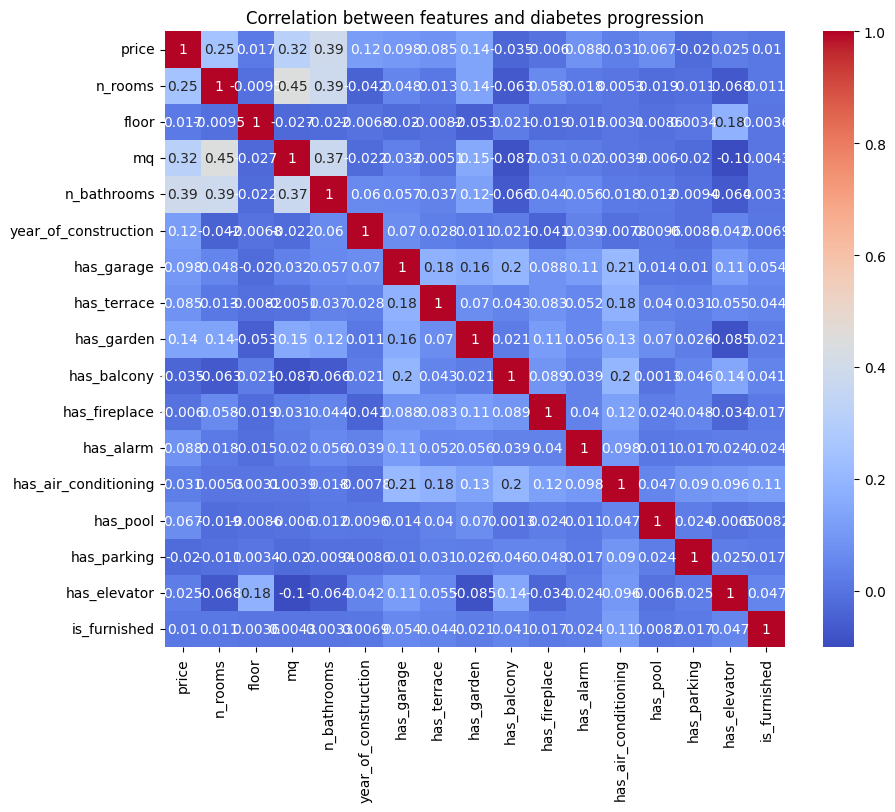

In [20]:
# General dataset information
df.info()

# Descriptive statistics of the dataset
df.describe()

# Heatmap showing the correlation between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between features and diabetes progression')
plt.show()


In [21]:
df

,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished
10,90000.0,5.0,2.0,124.0,2.0,2002.0,0,0,0,0,0,0,0,0,0,0,1
13,59000.0,4.0,3.0,127.0,1.0,2001.0,0,0,0,0,1,0,1,0,0,1,0
15,65000.0,2.0,3.0,45.0,1.0,1950.0,0,0,0,0,0,0,0,0,0,0,0
16,120000.0,2.0,3.0,45.0,1.0,1900.0,0,0,0,0,1,0,0,0,1,0,0
17,22000.0,2.0,3.0,70.0,1.0,1900.0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213402,215000.0,4.0,1.0,128.0,1.0,1960.0,0,0,0,0,0,0,0,0,0,0,0
213404,100000.0,2.0,1.0,50.0,1.0,1994.0,0,0,0,0,0,0,1,0,0,0,0
213405,130000.0,4.0,1.0,190.0,2.0,1994.0,0,0,0,0,0,0,0,0,0,0,0
213406,210000.0,3.0,1.0,80.0,1.0,1920.0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
# Splitting data into training and testing sets
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

from mlxtend.preprocessing import minmax_scaling

data = minmax_scaling(df, columns=['price','n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 
    'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool',
    'has_parking', 'has_elevator', 'is_furnished'])

#data = data.set_axis(['price','n_bathrooms', 'has_fireplace', 'has_alarm', 'has_pool',
 #   'has_parking', 'has_elevator'], axis=1)

X = data.drop('price', axis=1)
y = data['price']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X_train)
#print(y_train.head())

# Limpieza y inclusión de datos de prueba 

En este apartado se realiza una limpieza igual a la que se le realizo al conjunto de datos de entrenamiento. 

In [23]:
import pandas as pd
import numpy as np
df_test= pd.read_csv("Downloads/test_housing_data_italy.csv")

df_test.describe()
df_test.info()
df_test.isnull().sum()
df_test= df_test.dropna()
df_test.info()
df_test = df_test.query('price>1 & price < 3300000.0 & floor < 30 & year_of_construction< 2025')
df_test = df_test.query('price < 380000.0')
df_test

df_test= df_test[["price","n_rooms","floor", "mq", "n_bathrooms", "year_of_construction", "has_garage", "has_terrace", 	
           "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
            "has_pool", "has_parking", "has_elevator", "is_furnished"]]

df_test = minmax_scaling(df_test, columns=['price','n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 
    'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool',
    'has_parking', 'has_elevator', 'is_furnished'])


X_t = df_test.drop(['price'], axis = 1) # Considering all Predictors
y_t = df_test['price']

X_test = X_t
y_test = y_t

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
X_train = X
y_train = y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             10000 non-null  float64
 1   location              10000 non-null  object 
 2   title                 10000 non-null  object 
 3   price                 8362 non-null   float64
 4   n_rooms               7525 non-null   float64
 5   floor                 6737 non-null   float64
 6   mq                    9855 non-null   float64
 7   n_bathrooms           9407 non-null   float64
 8   year_of_construction  10000 non-null  float64
 9   availability          10000 non-null  object 
 10  energy_class          9969 non-null   object 
 11  status                10000 non-null  object 
 12  heating               10000 non-null  object 
 13  has_garage            10000 non-null  int64  
 14  has_terrace           10000 non-null  int64  
 15  has_garden          

In [24]:
# Function to evaluate models and plot predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

Model: Linear Regression
Train R^2: 0.2214
Test R^2: 0.2229
Test RMSE: 0.1885
----------------------------------------


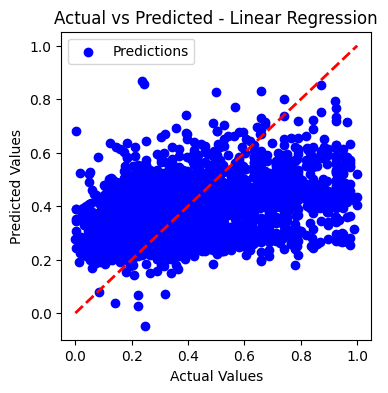

Model: Ridge Regression
Train R^2: 0.2214
Test R^2: 0.2229
Test RMSE: 0.1885
----------------------------------------


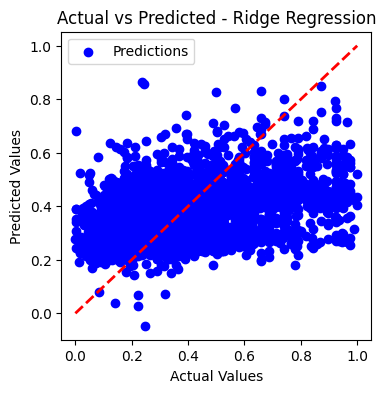

Model: Lasso Regression
Train R^2: 0.0000
Test R^2: -0.0038
Test RMSE: 0.2142
----------------------------------------


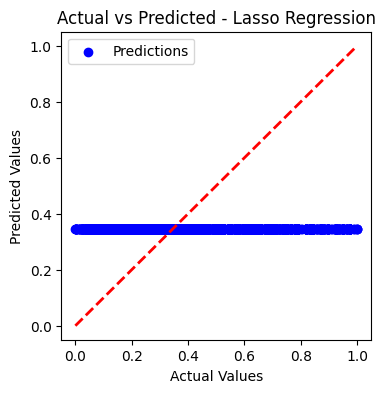

Model: Random Forest Regression
Train R^2: 0.8214
Test R^2: 0.2029
Test RMSE: 0.1909
----------------------------------------


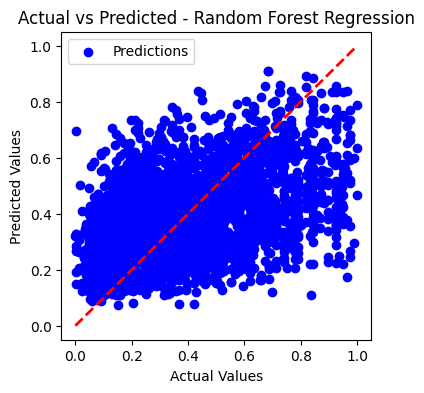

In [25]:
# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')


In [26]:
# Example code: Multivariate Regression with multiple features
X_multi=X 
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

print(f'R^2: {r2_score(y_test, y_pred)}')

R^2: 0.22441518557428441


# Modelos de regresión sin escalamiento de datos

En este apartado se aplican 12 métodos de regresión para los datos de casa en italia sin realizar ningun escalamiento a los datos, se alcanzo un r²= 0.32 con el método de regresion CatBost siendo este la métrica mas alta alcanzada. 

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools

import time

# used to supress display of warnings
import warnings

# ols library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import missingno as mno
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# import zscore for scaling the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# pre-processing methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import TransformedTargetRegressor

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

from sklearn.pipeline import Pipeline

# feature-selection methods
from sklearn.feature_selection import SelectFromModel

# bootstrap sampling
from sklearn.utils import resample


import pandas as pd
import numpy as np
df= pd.read_csv("Downloads/train_housing_data_italy.csv")
df.describe()
df.info()
df.isnull().sum()
df= df.dropna()
df.info()
df = df.query('price>1 & price < 3300000.0 & floor < 30 & year_of_construction< 2025')
df = df.query('price < 380000.0')

df= df[["price","n_rooms","floor", "mq", "n_bathrooms", "year_of_construction", "has_garage", "has_terrace", 	
           "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
            "has_pool", "has_parking", "has_elevator", "is_furnished"]]

X = df.drop(['price'], axis = 1) # Considering all Predictors
y = df['price']

import pandas as pd
import numpy as np
df_test= pd.read_csv("Downloads/test_housing_data_italy.csv")
df_test

df_test.describe()
df_test.info()
df_test.isnull().sum()
df_test= df_test.dropna()
df_test.info()
df_test = df_test.query('price>1 & price < 3300000.0 & floor < 30 & year_of_construction< 2025')
df_test = df_test.query('price < 380000.0')
df_test= df_test[["price","n_rooms","floor", "mq", "n_bathrooms", "year_of_construction", "has_garage", "has_terrace", 	
           "has_garden", "has_balcony", "has_fireplace", "has_alarm" , "has_air_conditioning", 	
            "has_pool", "has_parking", "has_elevator", "is_furnished"]]

X_t = df_test.drop(['price'], axis = 1) # Considering all Predictors
y_t = df_test['price']

X_test = X_t
y_test = y_t



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
X_train = X
y_train = y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

In [66]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale):
    
    print (model)
    print ("***************************************************************************")
    
    if scale == 'yes':
        # prepare the model with input scaling
        pipeline = Pipeline([('scaler', PowerTransformer()), ('model', model)])
    elif scale == 'no':
        # prepare the model with input scaling
        pipeline = Pipeline([('model', model)])

    pipeline.fit(X_train, y_train) # Fit the model on Training set
    prediction = pipeline.predict(X_test) # Predict on Test set

    r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))
    
    # Accuracy of Training data set
    train_accuracy_score = pipeline.score(X_train, y_train)
    
    # Accuracy of Test data set
    test_accuracy_score = pipeline.score(X_test, y_test)
    
    print ("***************************************************************************")
    
    if of_type == "coef":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        print(model.coef_)
        coef = pd.DataFrame(np.sort(model.coef_)[::-1].ravel())
        coef["feat"] = X_train.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r", linewidth=2)
        ax1.set_facecolor("lightgrey")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    elif of_type == "feat":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        coef = pd.DataFrame(np.sort(model.feature_importances_)[::-1])
        coef["feat"] = X_train.columns
        ax2 = sns.barplot(coef["feat"], coef[0],palette="jet_r", linewidth=2)
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method, 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': train_accuracy_score, 
                              'Test Accuracy': test_accuracy_score}, index=[index])
    
    return resultsDf  # return all the metrics along with predictions

In [67]:
def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    # define regressor models
    models=[['LinearRegression',LinearRegression()],
        ['Ridge',Ridge(random_state = 1)],
        ['Lasso',Lasso(random_state = 1)],
        ['KNeighborsRegressor',KNeighborsRegressor(n_neighbors = 3)],
        ['SVR',SVR(kernel = 'linear')],
        ['RandomForestRegressor',RandomForestRegressor(random_state = 1)],
        ['BaggingRegressor',BaggingRegressor(random_state = 1)],
        ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 1)],
        ['AdaBoostRegressor',AdaBoostRegressor(random_state = 1)],
        ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 1)],
        ['CatBoostRegressor',CatBoostRegressor(random_state = 1, verbose=False)],
        ['XGBRegressor',XGBRegressor()]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, regressor in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(regressor, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale)

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common


In [68]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # define grid search
    cv = KFold(n_splits=10, random_state=1)
    #grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                     #scoring = 'neg_root_mean_squared_error', error_score=0)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                     scoring = 'neg_root_mean_squared_error', error_score=0)
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print(name, "- Least: RMSE %f using %s" % (model_grid_result.best_score_ * (-1), model_grid_result.best_params_))
    
    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

In [69]:
# Building a Linear Regression model
lr = LinearRegression()
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'LinearRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

LinearRegression()
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.2219,71433.09034,0.221438,0.2219


In [70]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2

# OLS library expects the X and y to be given in one single dataframe
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

lr_ols = smf.ols(formula= 'price ~ n_rooms+floor + mq + n_bathrooms + year_of_construction + has_garage + has_terrace + has_garden + has_balcony + has_fireplace + has_alarm + has_air_conditioning + 	 has_pool + has_parking + has_elevator + is_furnished ', 
              data = df_train).fit()

print(lr_ols.summary())  # Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     1481.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:27:15   Log-Likelihood:            -1.0494e+06
No. Observations:               83357   AIC:                         2.099e+06
Df Residuals:                   83340   BIC:                         2.099e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.032e+05 

In [71]:
# Transfom X_train and X_test to polynomial features
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2, interaction_only=True))])
X_train_poly2 = pd.DataFrame(pipe.fit_transform(X_train))
X_test_poly2 = pd.DataFrame(pipe.fit_transform(X_test))

# Train and Test the model
lr_resultsDf = train_test_model(lr, 'Linear Regression with interaction features', X_train_poly2, X_test_poly2, y_train, y_test, 
                                'none', 4, 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_resultsDf])
resultsDf

LinearRegression()
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.221900,71433.090340,0.221438,0.221900
4,Linear Regression with interaction features,0.278078,68806.057137,0.286015,0.278078


In [72]:
for i in range(1,4):
    pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = i)), 
                 ('model', LinearRegression())])
    pipe.fit(X_train, y_train) # Fit the model on Training set
    prediction = pipe.predict(X_test) # Predict on Test set

    r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
    
    print ("R-Squared for {0} degree polynomial is {1}".format(i, r2))
    print ("ROOT MEAN SQUARED ERROR for {0} degree polynomial features is {1}".format(i, rmse),"\n")

R-Squared for 1 degree polynomial is 0.26511911880562744
ROOT MEAN SQUARED ERROR for 1 degree polynomial features is 69420.87520321568 

R-Squared for 2 degree polynomial is 0.299625034638364
ROOT MEAN SQUARED ERROR for 2 degree polynomial features is 67771.47177343225 

R-Squared for 3 degree polynomial is 0.29743693953772854
ROOT MEAN SQUARED ERROR for 3 degree polynomial features is 67877.25424130935 



In [73]:
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2)), 
                 ('model', LinearRegression())])
    
pipe.fit(X_train, y_train) # Fit the model on Training set
prediction = pipe.predict(X_test) # Predict on Test set
        
r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error

print ("R-Squared :", r2)
print ("ROOT MEAN SQUARED ERROR :", rmse)

# Accuracy of Training data set
print("Accuracy of Training data set: {0:.4f} %".format(pipe.score(X_train, y_train)))

# Accuracy of Test data set
accuracy_score = pipe.score(X_test, y_test)
print("Accuracy of Test data set: {0:.4f} %".format(accuracy_score))

R-Squared : 0.299625034638364
ROOT MEAN SQUARED ERROR : 67771.47177343225
Accuracy of Training data set: 0.3046 %
Accuracy of Test data set: 0.2996 %


In [74]:
# Store the accuracy results for each model in a dataframe for final comparison
poly_resultsDf = pd.DataFrame({'Method': 'Linear Regression with Polynomial features', 'R Squared': r2, 'RMSE': rmse, 'Train Accuracy': pipe.score(X_train, y_train), 
                          'Test Accuracy': accuracy_score}, index=[7])
resultsDf = pd.concat([resultsDf, poly_resultsDf])
resultsDf

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.221900,71433.090340,0.221438,0.221900
4,Linear Regression with interaction features,0.278078,68806.057137,0.286015,0.278078
7,Linear Regression with Polynomial features,0.299625,67771.471773,0.304565,0.299625


In [75]:
# Transfom X_train and X_test to polynomial features
pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = 2))])
X_train_poly_2 = pd.DataFrame(pipe.fit_transform(X_train))
X_test_poly_2 = pd.DataFrame(pipe.fit_transform(X_test))

In [76]:

# Scale the data using PowerTransformer
scale = PowerTransformer()
df_scaled = pd.DataFrame(scale.fit_transform(df))


In [77]:
cluster_range = range(1, 15)  
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(n_clusters = num_clusters, n_init = 5, random_state = 1)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_ )

clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1.417069e+06
1,2,1.278790e+06
2,3,1.194142e+06
3,4,1.121957e+06
4,5,1.049789e+06
5,6,9.881717e+05
6,7,9.110611e+05
7,8,8.671526e+05
8,9,7.951820e+05
9,10,7.598269e+05


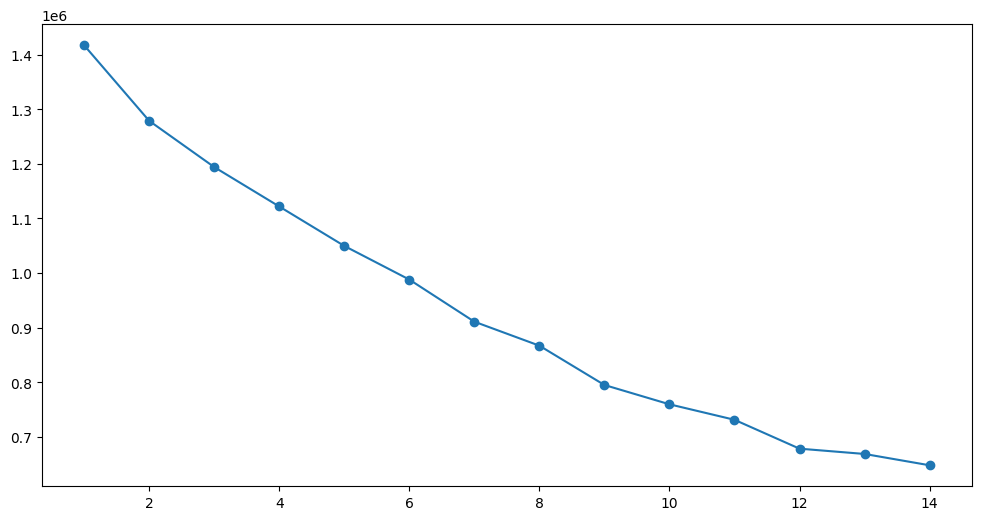

In [78]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

In [79]:
# k = 6
cluster = KMeans(n_clusters = 6, random_state = 1)
cluster.fit(df_scaled)

KMeans(n_clusters=6, random_state=1)

In [80]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(df_scaled)
df_scaled["GROUP"] = prediction

In [81]:
centroids = cluster.cluster_centers_
centroids

array([[ 2.22140796e-01,  3.00432336e-02, -3.38736371e-02,
         1.64375045e-02,  9.92844097e-02,  1.25199902e-01,
         4.47440263e-01,  2.62510848e+00,  1.76685685e-01,
         1.00491855e-01,  2.13976672e-01, -9.87493261e-02,
         4.19525659e-01,  1.02484655e-01,  7.05540663e-02,
         1.23728549e-01, -2.81564479e-01],
       [-4.59194909e-01, -4.36681717e-01,  2.27386383e-02,
        -4.92766228e-01, -6.70025046e-01, -1.61154349e-01,
        -2.38984077e-01, -3.80175603e-01, -1.98377403e-01,
        -4.13470894e-01, -9.56706751e-02, -9.87493261e-02,
        -1.99857816e-01, -3.84207601e-02, -2.45423649e-02,
        -5.40341292e-02, -2.81564479e-01],
       [-1.74956394e-01, -2.41203590e-01,  7.32943389e-02,
        -3.06063539e-01, -2.67977552e-01, -4.38441400e-02,
         4.33659532e-01, -3.70482140e-01, -4.59928001e-03,
         2.41190867e+00,  1.86157382e-01, -9.87493261e-02,
         4.11216992e-01, -7.08377259e-03,  1.17085512e-01,
         3.77163261e-01, -2.8

In [82]:
centroid_df = pd.DataFrame(centroids, columns = list(df))
centroid_df

,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,has_garage,has_terrace,has_garden,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished
0,0.222141,0.030043,-0.033874,0.016438,0.099284,0.125200,0.447440,2.625108,0.176686,0.100492,0.213977,-0.098749,0.419526,0.102485,0.070554,0.123729,-0.281564
1,-0.459195,-0.436682,0.022739,-0.492766,-0.670025,-0.161154,-0.238984,-0.380176,-0.198377,-0.413471,-0.095671,-0.098749,-0.199858,-0.038421,-0.024542,-0.054034,-0.281564
2,-0.174956,-0.241204,0.073294,-0.306064,-0.267978,-0.043844,0.433660,-0.370482,-0.004599,2.411909,0.186157,-0.098749,0.411217,-0.007084,0.117086,0.377163,-0.281564
3,0.847099,0.188890,-0.136126,0.314421,0.572660,0.702289,1.117090,0.526610,0.566781,0.399196,0.409075,10.126651,0.991072,0.108730,0.176421,0.245184,0.242220
4,0.572305,0.657922,-0.044491,0.766784,0.954610,0.160058,-0.077706,-0.380158,0.171856,-0.395105,-0.043691,-0.098749,-0.160041,0.006327,-0.054429,-0.156113,-0.281564
5,0.032055,0.035692,0.016086,0.003974,0.008495,0.025879,0.177239,0.149580,0.066890,0.138992,0.055585,-0.098749,0.388857,0.028333,0.054780,0.159279,3.551584


In [83]:
def train_test_transform(X_train, X_test):
    scale = PowerTransformer()
    
    X_train_scaled = pd.DataFrame(scale.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scale.fit_transform(X_test))
    
    return X_train_scaled, X_test_scaled

Text(0, 0.5, 'Mean error')

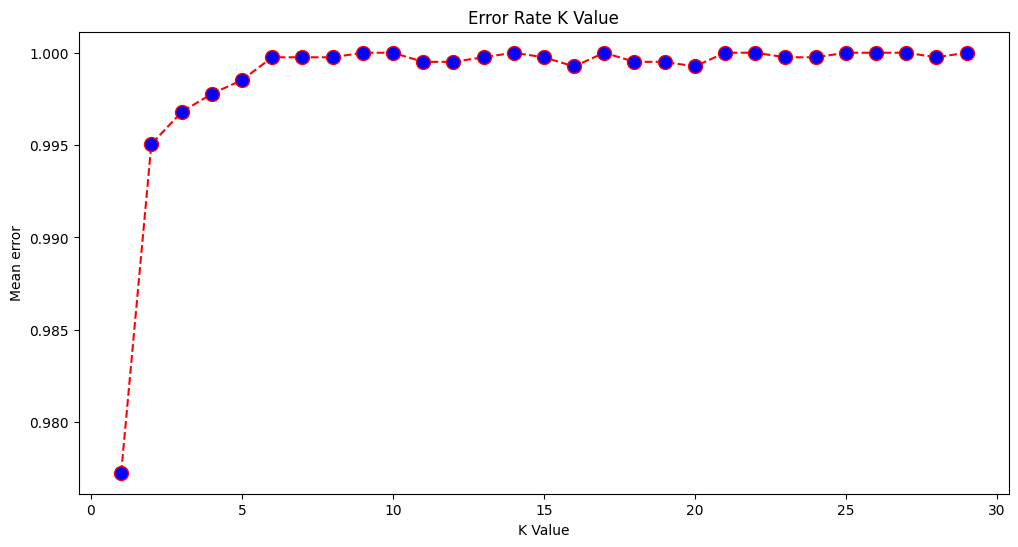

In [84]:
# empty list that will hold error
error = []

X_train_scaled, X_test_scaled = train_test_transform(X_train, X_test)

# perform error metrics for values from 1,2,3....29
for k in range(1,30):
    
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    # predict the response
    y_pred = knn.predict(X_test_scaled)
    error.append(np.mean(y_pred != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [85]:
# Building a KNN Regression model
knn = KNeighborsRegressor(n_neighbors = 30)

# Train and Test the model
knn_resultsDf = train_test_model(knn, 'KNeighborsRegressor', X_train, X_test, y_train, y_test, 'none', 10, 'yes')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf, knn_resultsDf])
resultsDf

KNeighborsRegressor(n_neighbors=30)
***************************************************************************
***************************************************************************


,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.221900,71433.090340,0.221438,0.221900
4,Linear Regression with interaction features,0.278078,68806.057137,0.286015,0.278078
7,Linear Regression with Polynomial features,0.299625,67771.471773,0.304565,0.299625
10,KNeighborsRegressor,0.268673,69252.789892,0.333428,0.268673


In [86]:
# Selecting features using Lasso regularisation using SelectFromModel
sel_ = SelectFromModel(Lasso(random_state = 1))
sel_.fit(X_train, y_train)

# Visualising features that were kept by the lasso regularisation
sel_.get_support()

# Make a list of with the selected features
lasso_selected_feat = X_train.columns[(sel_.get_support())]

# Prepare train and test data
X_train_lasso = X_train[lasso_selected_feat]
X_test_lasso = X_test[lasso_selected_feat]

# Lasso with it's important features
X_train_lasso.columns

Index(['n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction',
       'has_garage', 'has_terrace', 'has_garden', 'has_balcony',
       'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool',
       'has_parking', 'has_elevator', 'is_furnished'],
      dtype='object')

In [88]:
# Train and Test all models with Lasso interaction terms
train_test_allmodels(X_train_lasso, X_test_lasso, y_train, y_test, 'no')

LinearRegression()
***************************************************************************
***************************************************************************
Ridge(random_state=1)
***************************************************************************
***************************************************************************
Lasso(random_state=1)
***************************************************************************
***************************************************************************
KNeighborsRegressor(n_neighbors=3)
***************************************************************************
***************************************************************************
SVR(kernel='linear')
***************************************************************************
***************************************************************************
RandomForestRegressor(random_state=1)
***************************************************************************
*******

,Method,R Squared,RMSE,Train Accuracy,Test Accuracy
1,LinearRegression,0.221900,71433.090340,0.221438,0.221900
2,Ridge,0.221897,71433.187265,0.221438,0.221897
3,Lasso,0.221896,71433.276443,0.221438,0.221896
4,KNeighborsRegressor,0.110528,76374.405930,0.532040,0.110528
5,SVR,0.104570,76629.760316,0.111577,0.104570
6,RandomForestRegressor,0.212163,71878.609612,0.821516,0.212163
7,BaggingRegressor,0.155497,74418.729605,0.788940,0.155497
8,ExtraTreesRegressor,0.126115,75702.254630,0.904552,0.126115
9,AdaBoostRegressor,0.168132,73859.896836,0.151295,0.168132
10,GradientBoostingRegressor,0.316980,66926.526273,0.328023,0.316980


## Discusión y conclusiones
De acuerdo a los resultados anteriores se presenta de manera clara los inconvenientes que pueden surgir cuando se cuenta con información del mundo real, lo que conlleva la toma de decisiones para el buen desempeño de los modelos ajustados. A su vez se encontro que el escalamiento de los datos no mejora los resultados en los modelos ajustados. Por otro lado se identifico la necesidad de abordar el analisis de datos mediante técnicas mas avanzadas que los modelos de regresión lineal. A su vez se identifico que las técnicas de selección de caracteristicas no aportarón mucha información a los resultados del modelo de regresión final por lo que se omitierón del analisis final. Lo anterior orienta a la busqueda de tecnicas de selección de caracteristicas mas poderosas ya que es un paso importante al ajustar métodos de regresión. 
Por ultimo, se resalta que si desde el inicio la calidad de los datos analizados es deficiente no hay muchas oportunidades que algun método de regresión pueda obtener buenos resultados ya que su desempeño es equivalente a la calidad de los datos de entrada. 